# YouTube Streamer Analysis

# This dataset contains valuable information about the top YouTube streamers, including their ranking, categories, subscribers, country, views, likes, comments, and more. Your task is to perform a comprehensive analysis of the dataset to extract insights about the top YouTube content creators.


# ---------------------------------------------------------------------------------------------------------------

## import Liabries

In [1]:
import pandas as pd
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Assuming the dataset is in a CSV file
df = pd.read_csv(r"C:\Users\Sadiq\Downloads\intern\task1\youtubers_df.csv")

# Data Exploration:

In [3]:
# Display the first few rows of the dataset
print(df.head())

   Rank       Username           Categories   Suscribers         Country  \
0     1        tseries       Música y baile  249500000.0           India   
1     2        MrBeast   Videojuegos, Humor  183500000.0  Estados Unidos   
2     3      CoComelon            Educación  165500000.0         Unknown   
3     4       SETIndia                  NaN  162600000.0           India   
4     5  KidsDianaShow  Animación, Juguetes  113500000.0         Unknown   

        Visits      Likes  Comments  \
0      86200.0     2700.0      78.0   
1  117400000.0  5300000.0   18500.0   
2    7000000.0    24700.0       0.0   
3      15600.0      166.0       9.0   
4    3900000.0    12400.0       0.0   

                                               Links  
0  http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...  
1  http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...  
2  http://youtube.com/channel/UCbCmjCuTUZos6Inko4...  
3  http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...  
4  http://youtube.com/channel/UCk

In [4]:
# Assuming you want to change the column name 'categories' to 'content_categories'
df.rename(columns={'Suscribers': 'Subscribers'}, inplace=True)
df.rename(columns={'Visits': 'Views'}, inplace=True)


In [5]:
# Display basic information about the dataset
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rank         1000 non-null   int64  
 1   Username     1000 non-null   object 
 2   Categories   694 non-null    object 
 3   Subscribers  1000 non-null   float64
 4   Country      1000 non-null   object 
 5   Views        1000 non-null   float64
 6   Likes        1000 non-null   float64
 7   Comments     1000 non-null   float64
 8   Links        1000 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 70.4+ KB
None


In [6]:
# Display summary statistics for numerical columns
print(df.describe())

              Rank   Subscribers         Views         Likes       Comments
count  1000.000000  1.000000e+03  1.000000e+03  1.000000e+03    1000.000000
mean    500.500000  2.189440e+07  1.209446e+06  5.363259e+04    1288.768000
std     288.819436  1.682775e+07  5.229942e+06  2.580457e+05    6778.188308
min       1.000000  1.170000e+07  0.000000e+00  0.000000e+00       0.000000
25%     250.750000  1.380000e+07  3.197500e+04  4.717500e+02       2.000000
50%     500.500000  1.675000e+07  1.744500e+05  3.500000e+03      67.000000
75%     750.250000  2.370000e+07  8.654750e+05  2.865000e+04     472.000000
max    1000.000000  2.495000e+08  1.174000e+08  5.300000e+06  154000.000000


In [7]:
# Display unique values in categorical columns
for column in df.select_dtypes(include='object').columns:
    print(f"Unique values in {column}: {df[column].unique()}")

Unique values in Username: ['tseries' 'MrBeast' 'CoComelon' 'SETIndia' 'KidsDianaShow' 'PewDiePie'
 'LikeNastyaofficial' 'VladandNiki' 'zeemusiccompany' 'WWE' 'BLACKPINK'
 'GoldminesTelefilms' 'SonySAB' '5MinuteCraftsYouTube' 'BTS' 'HYBELABELS'
 'zeetv' 'Pinkfong' 'ChuChuTV' 'KondZilla' 'colorstv' 'filmigaane'
 'TSeriesBhaktiSagar' 'tipsofficial' 'MOVIECLIPS' 'ElReinoInfantil'
 'dudeperfect' 'aajtak' 'WaveMusicIndia' 'SonyMusicIndia' 'marshmello'
 'yrf' 'infobellshindirhymes' 'LooLooKids' 'TaylorSwift' 'EdSheeran'
 'BillionSurpriseToys' 'ArianaGrande' 'shemaroo' 'JuegaGerman'
 'BillieEilish' 'getmovies' 'sonymusicindiaVEVO' 'A4a4a4a4'
 'badabunOficial' 'HarPalGeoOfficial' 'vootkids' 'ARYDigitalasia'
 'felipeneto' 'abscbnentertainment' 'vcsabiavideos' 'BRIGHTSIDEOFFICIAL'
 'KatyPerry' 'Shakira' 'whindersson' 'MashaBearRUSSIAN' 'Alanwalkermusic'
 'MashaBearEN' 'Mikecrack' 'toysandcolors' 'speedrecords'
 'LikeNastya_Show' 'KimberlyLoaiza' 'IshtarMusic' 'luisitocomunica'
 'LittleBabyBum' '

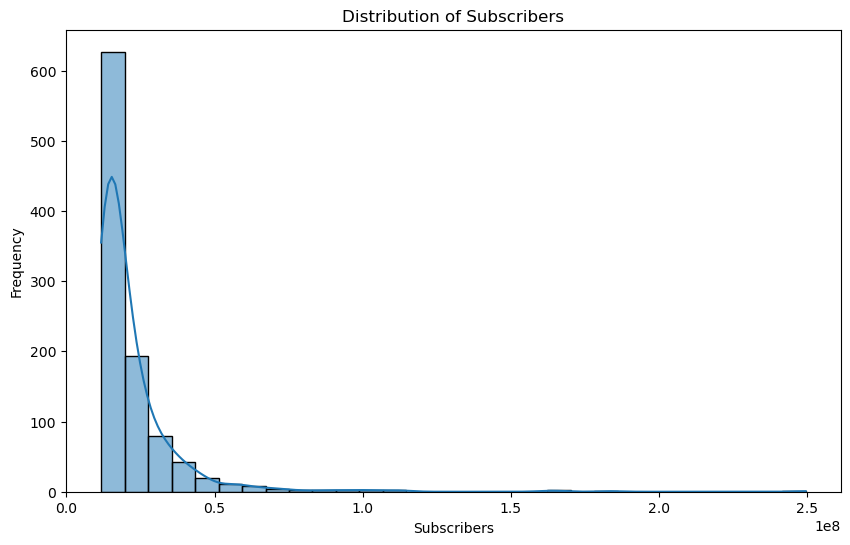

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Distribution of Subscribers
plt.figure(figsize=(10, 6))
sns.histplot(df['Subscribers'], bins=30, kde=True)
plt.title('Distribution of Subscribers')
plt.xlabel('Subscribers')
plt.ylabel('Frequency')
plt.show()


C:\Users\Sadiq\AppData\Local\Temp\ipykernel_6420\2179750735.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


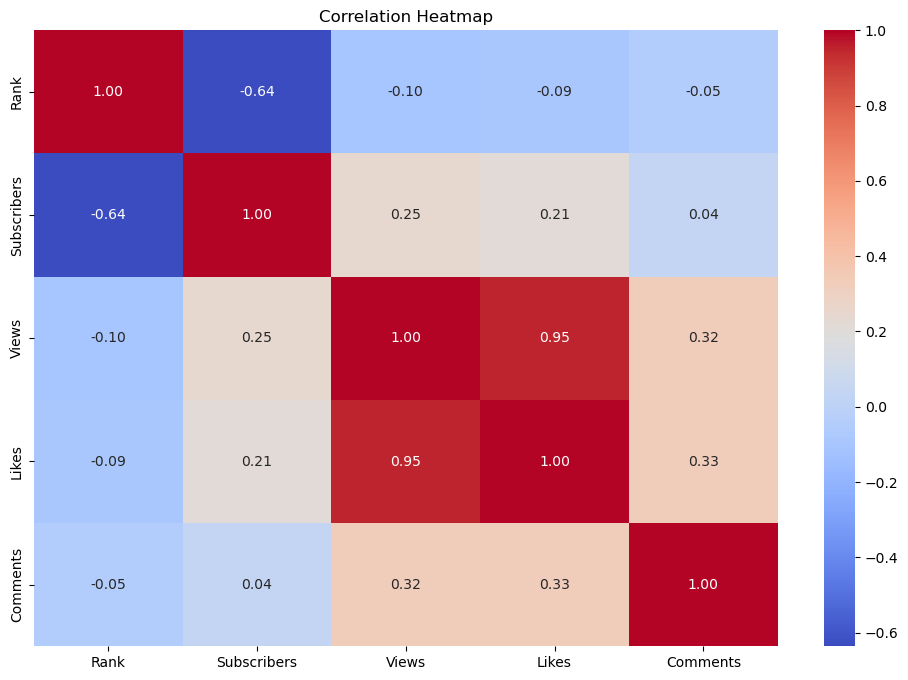

In [9]:
# Example: Correlation heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


# Check for missing data and outliers

In [34]:
# Check for missing data in the DataFrame
missing_data = df.isnull().sum()

# Display columns with missing data
print("Columns with missing data:")
print(missing_data[missing_data > 0])


Columns with missing data:
Series([], dtype: int64)


In [13]:
# Assuming your dataframe is named 'df' and 'categories' is the column you want to fill
df['Categories'].fillna('unknown', inplace=True)

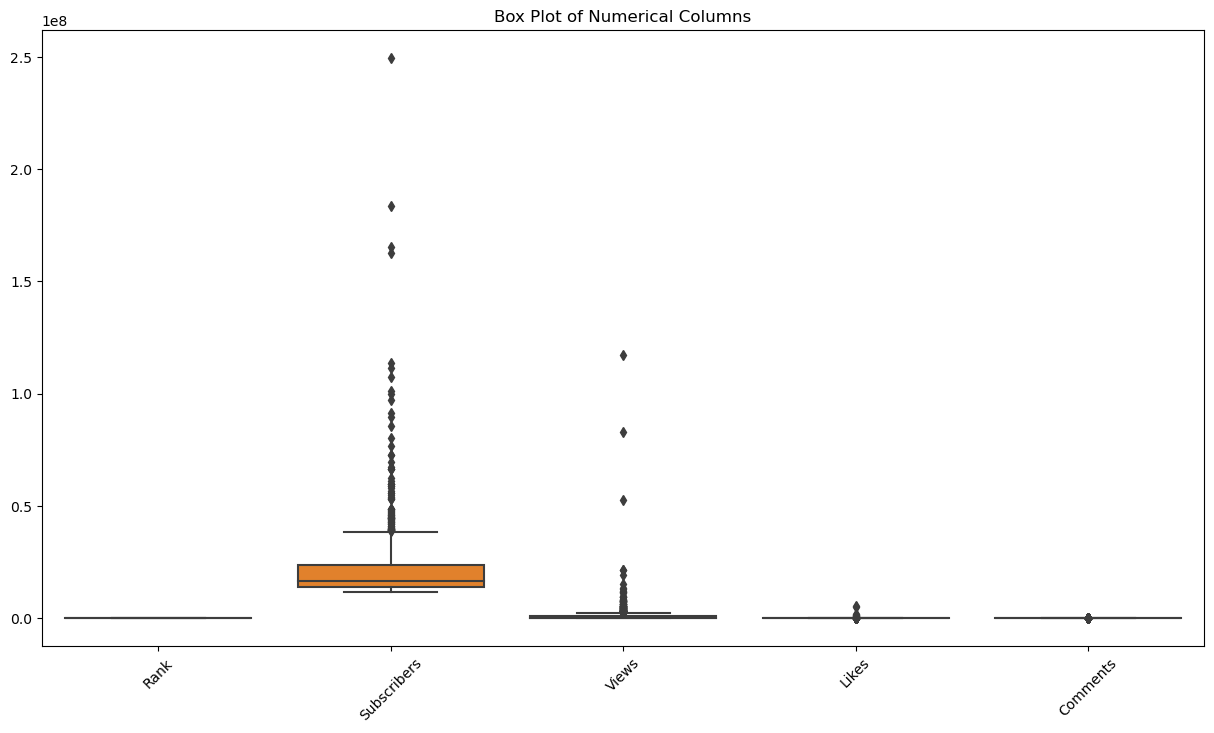

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create box plots to identify outliers in numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 8))
sns.boxplot(data=df[numerical_columns])
plt.title('Box Plot of Numerical Columns')
plt.xticks(rotation=45)
plt.show()


# Trend Analysis:

In [15]:
# Display unique values in the 'categories' column
print("Unique categories:", df['Categories'].unique())


Unique categories: ['Música y baile' 'Videojuegos, Humor' 'Educación' 'unknown'
 'Animación, Juguetes' 'Películas, Videojuegos' 'Juguetes' 'Videojuegos'
 'Películas, Animación' 'Películas' 'Noticias y Política'
 'Animación, Humor' 'Música y baile, Animación'
 'Música y baile, Películas' 'Películas, Juguetes' 'Películas, Humor'
 'Vlogs diarios' 'Videojuegos, Juguetes' 'Animación, Videojuegos'
 'Animación' 'Música y baile, Humor' 'Diseño/arte, DIY y Life Hacks'
 'Ciencia y tecnología' 'Fitness, Salud y autoayuda' 'Belleza, Moda'
 'Humor' 'Comida y bebida' 'Deportes' 'Fitness' 'Viajes, Espectáculos'
 'Comida y bebida, Salud y autoayuda' 'Diseño/arte'
 'DIY y Life Hacks, Juguetes' 'Educación, Juguetes'
 'Juguetes, Coches y vehículos' 'Música y baile, Juguetes'
 'Animales y mascotas' 'ASMR' 'Moda' 'DIY y Life Hacks'
 'Diseño/arte, Belleza' 'Coches y vehículos' 'Animación, Humor, Juguetes'
 'ASMR, Comida y bebida' 'Comida y bebida, Juguetes'
 'Juguetes, DIY y Life Hacks']


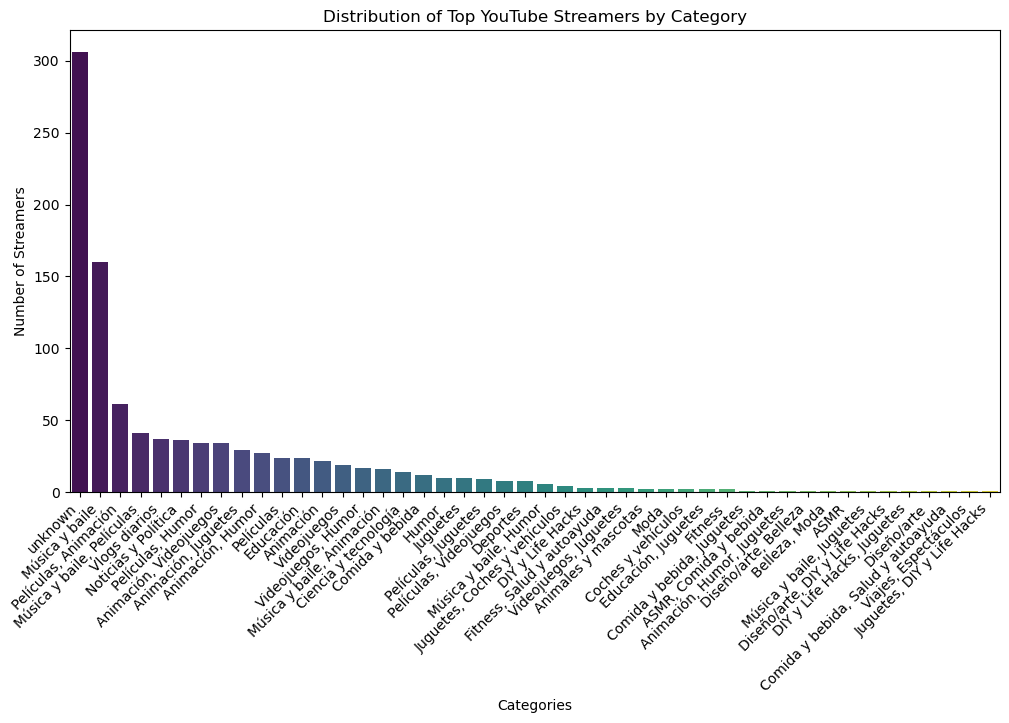

In [16]:
# Count the occurrences of each category
category_counts = df['Categories'].value_counts()

# Plot a bar chart to visualize the distribution of categories
plt.figure(figsize=(12, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.title('Distribution of Top YouTube Streamers by Category')
plt.xlabel('Categories')
plt.ylabel('Number of Streamers')
plt.xticks(rotation=45, ha='right')
plt.show()


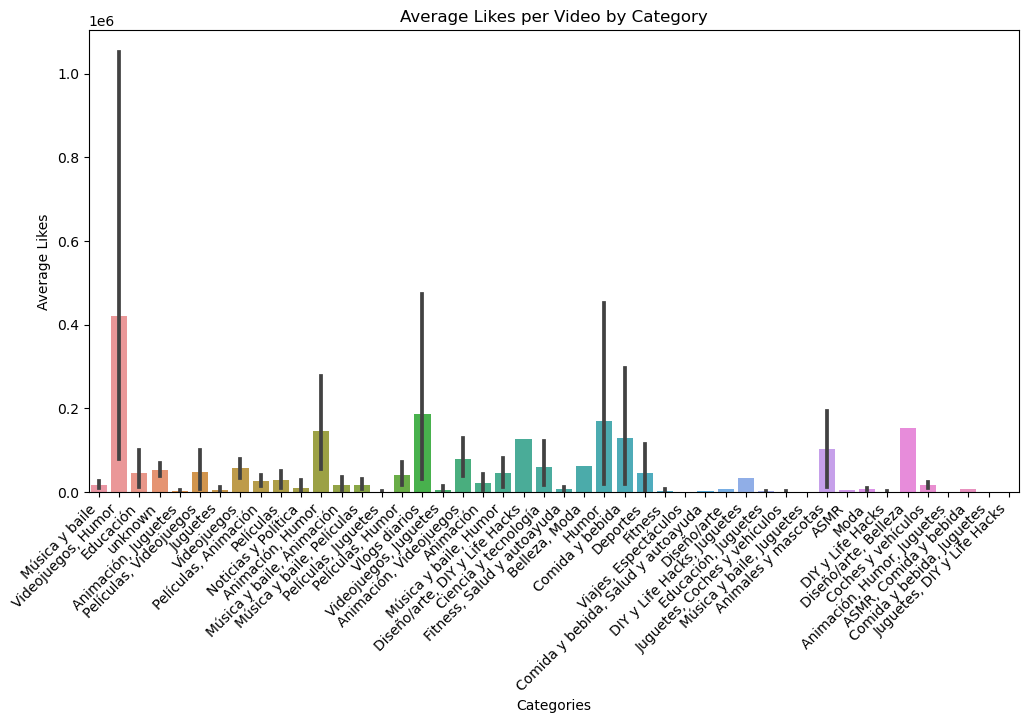

In [17]:
# Example: Average Likes per Video by Category
plt.figure(figsize=(12, 6))
sns.barplot(x='Categories', y='Likes', data=df, estimator='mean')
plt.title('Average Likes per Video by Category')
plt.xlabel('Categories')
plt.ylabel('Average Likes')
plt.xticks(rotation=45, ha='right')
plt.show()


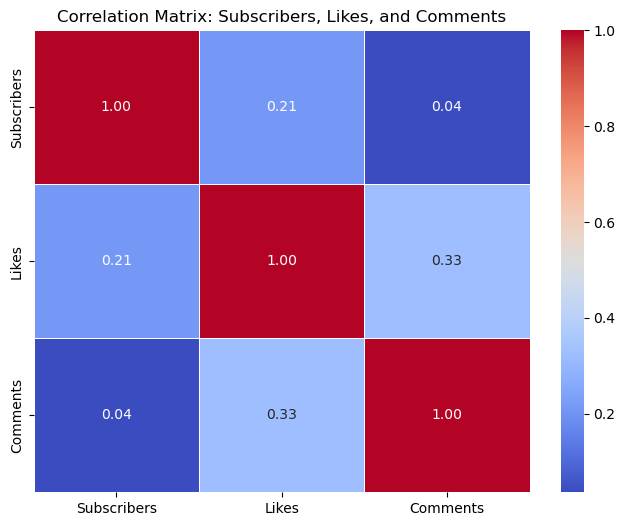

In [18]:
# Assuming 'subscribers', 'likes', and 'comments' are the column names in your DataFrame

# Calculate the correlation matrix
correlation_matrix = df[['Subscribers', 'Likes', 'Comments']].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix: Subscribers, Likes, and Comments')
plt.show()


# Audience Study:

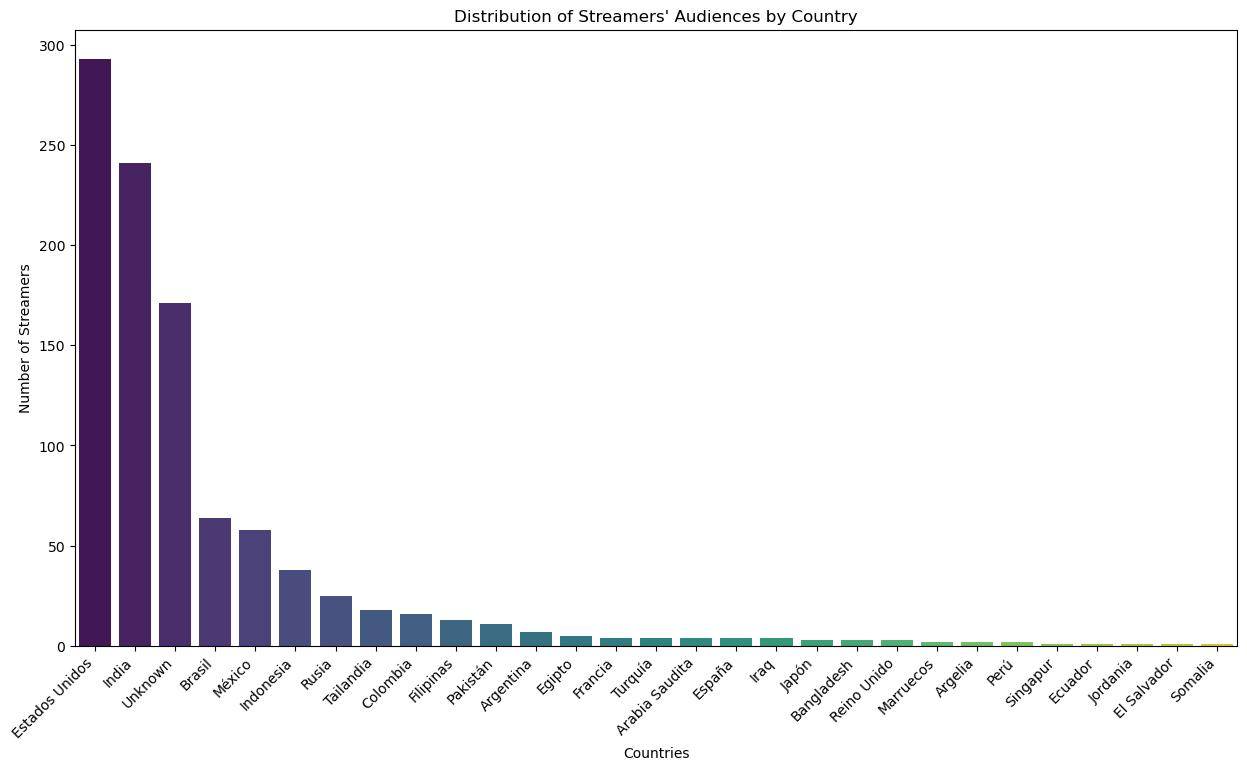

In [19]:
# Assuming 'country' is the column representing the country in your DataFrame

# Count the occurrences of each country
country_counts = df['Country'].value_counts()

# Plot a bar chart to visualize the distribution of streamers' audiences by country
plt.figure(figsize=(15, 8))
sns.barplot(x=country_counts.index, y=country_counts.values, palette='viridis')
plt.title('Distribution of Streamers\' Audiences by Country')
plt.xlabel('Countries')
plt.ylabel('Number of Streamers')
plt.xticks(rotation=45, ha='right')
plt.show()


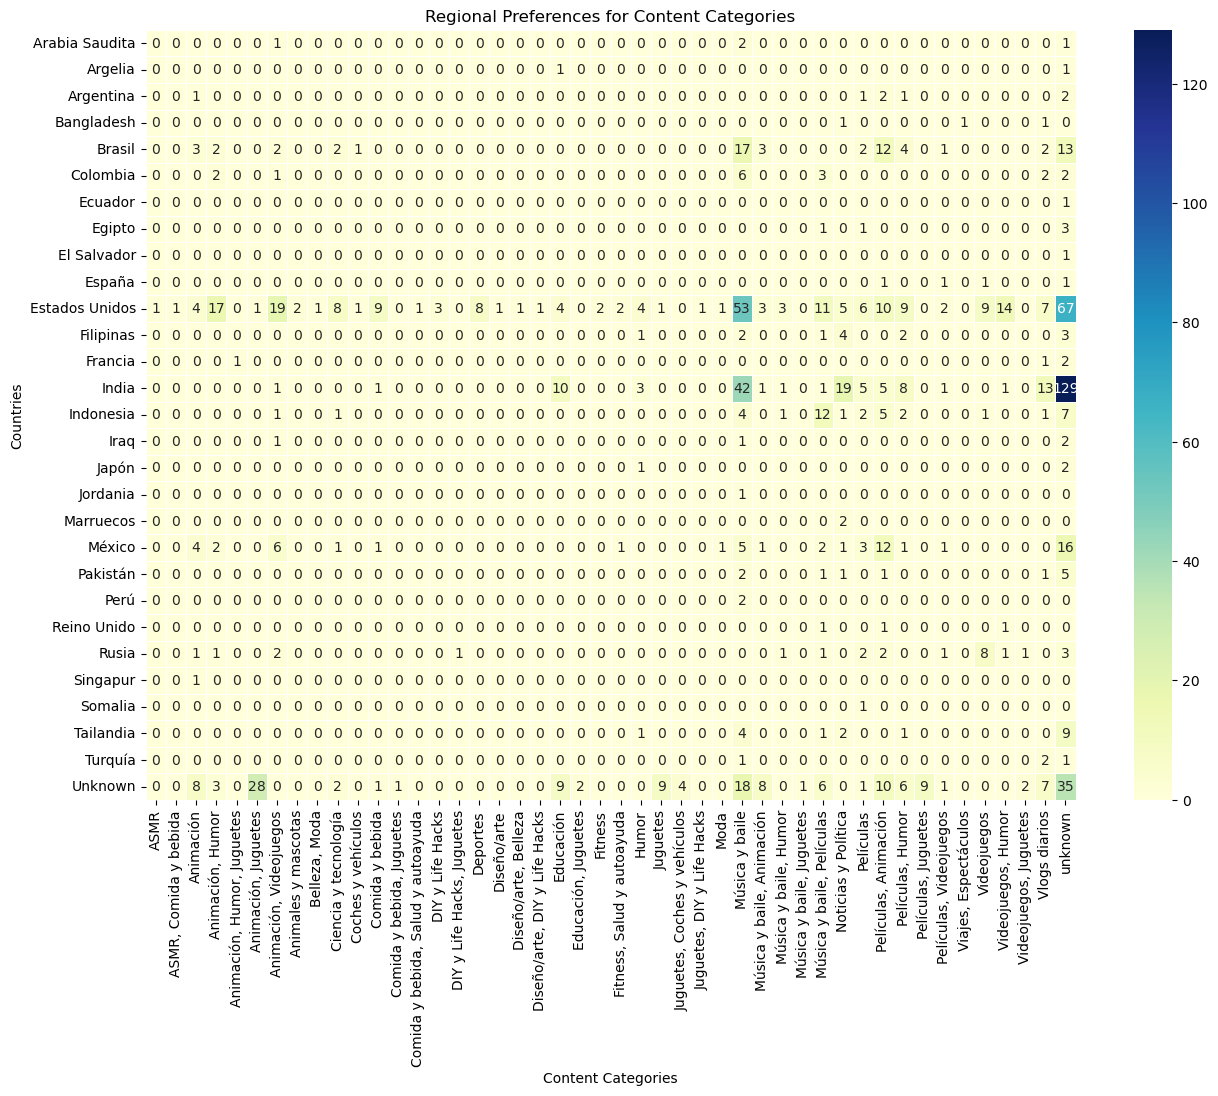

In [20]:
# Assuming 'country' and 'content_categories' are the relevant columns in your DataFrame

# Create a pivot table to analyze the count of content categories by country
category_by_country = df.pivot_table(index='Country', columns='Categories', aggfunc='size', fill_value=0)

# Plot a heatmap to visualize the regional preferences for specific content categories
plt.figure(figsize=(15, 10))
sns.heatmap(category_by_country, cmap='YlGnBu', annot=True, fmt='d', linewidths=.5)
plt.title('Regional Preferences for Content Categories')
plt.xlabel('Content Categories')
plt.ylabel('Countries')
plt.show()


# Performance Metrics

In [21]:
# Assuming 'subscribers', 'Views', 'likes', and 'comments' are the relevant columns in your DataFrame

# Calculate average metrics
average_metrics = df[['Subscribers', 'Views', 'Likes', 'Comments']].mean()

# Display the calculated averages
print("Average Subscribers:", average_metrics['Subscribers'])
print("Average Views:", average_metrics['Views'])
print("Average Likes:", average_metrics['Likes'])
print("Average Comments:", average_metrics['Comments'])


Average Subscribers: 21894400.0
Average Views: 1209446.3155
Average Likes: 53632.592
Average Comments: 1288.768


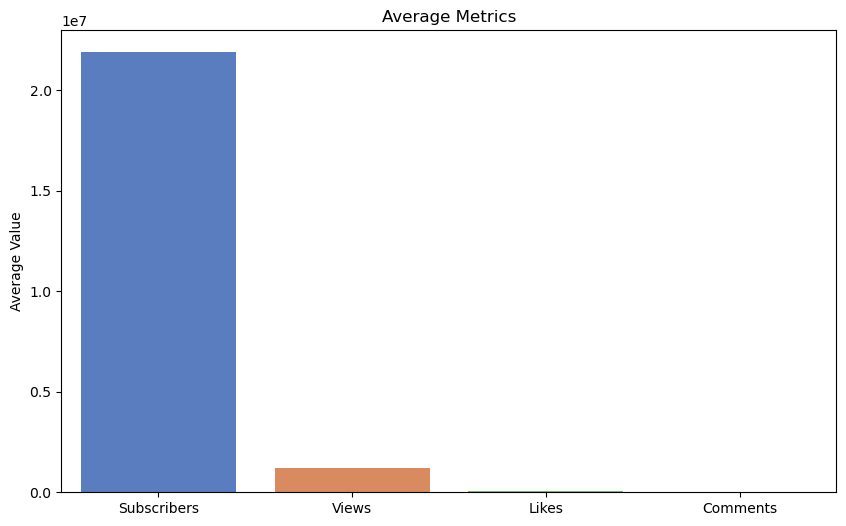

In [22]:
# Create a bar plot to visualize the average metrics
plt.figure(figsize=(10, 6))
sns.barplot(x=average_metrics.index, y=average_metrics.values, palette='muted')
plt.title('Average Metrics')
plt.ylabel('Average Value')
plt.show()


# Box Plots:

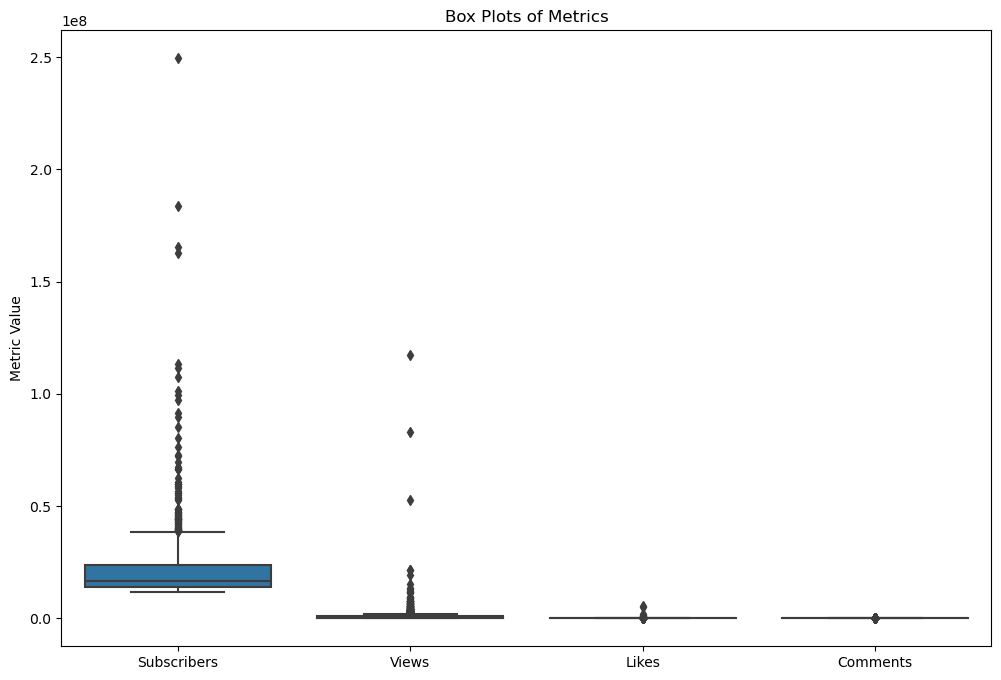

In [23]:
# Create box plots for each metric
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[['Subscribers', 'Views', 'Likes', 'Comments']])
plt.title('Box Plots of Metrics')
plt.ylabel('Metric Value')
plt.show()


# Pair Plots:

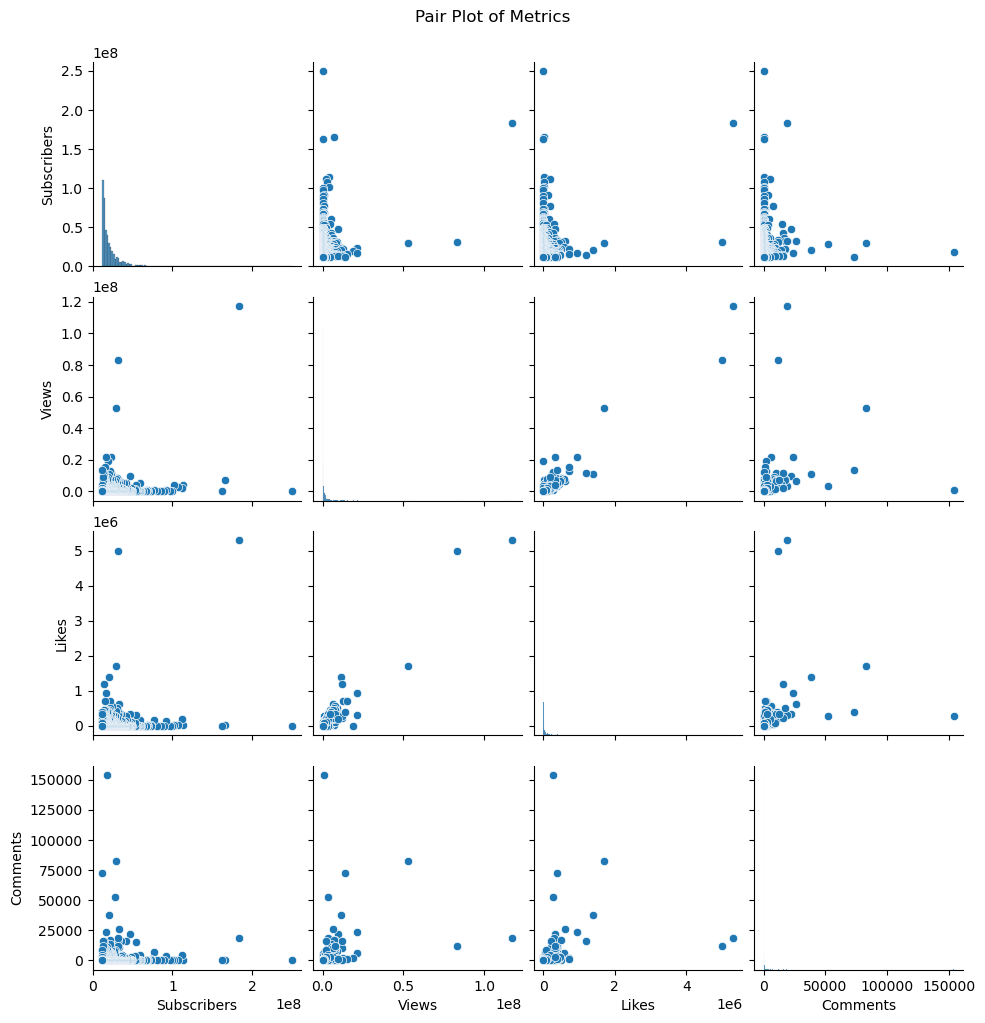

In [24]:
# Create pair plot for all metrics
sns.pairplot(df[['Subscribers', 'Views', 'Likes', 'Comments']])
plt.suptitle('Pair Plot of Metrics', y=1.02)
plt.show()


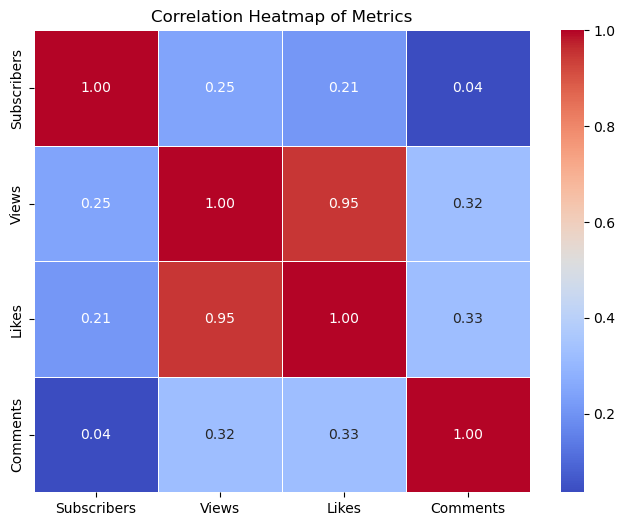

In [25]:
# Calculate correlation matrix
correlation_matrix = df[['Subscribers', 'Views', 'Likes', 'Comments']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap of Metrics')
plt.show()


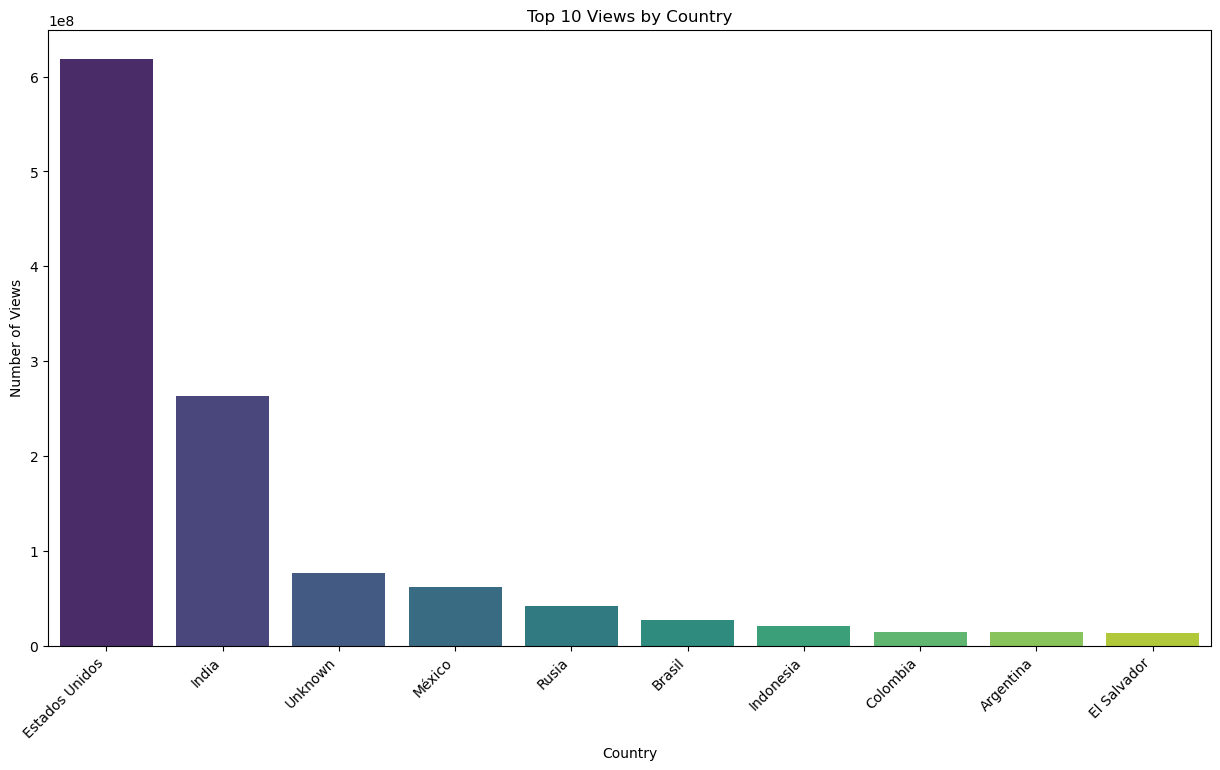

In [26]:
# Assuming 'Country' is the column representing countries and 'Views' is the column representing the number of views
# Display the top 10 countries with the highest number of views
top_countries_by_views = df.groupby('Country')['Views'].sum().nlargest(10)

# Plot a bar chart to visualize the top views by country
plt.figure(figsize=(15, 8))
sns.barplot(x=top_countries_by_views.index, y=top_countries_by_views.values, palette='viridis')
plt.title('Top 10 Views by Country')
plt.xlabel('Country')
plt.ylabel('Number of Views')
plt.xticks(rotation=45, ha='right')
plt.show()


# Content Categories:

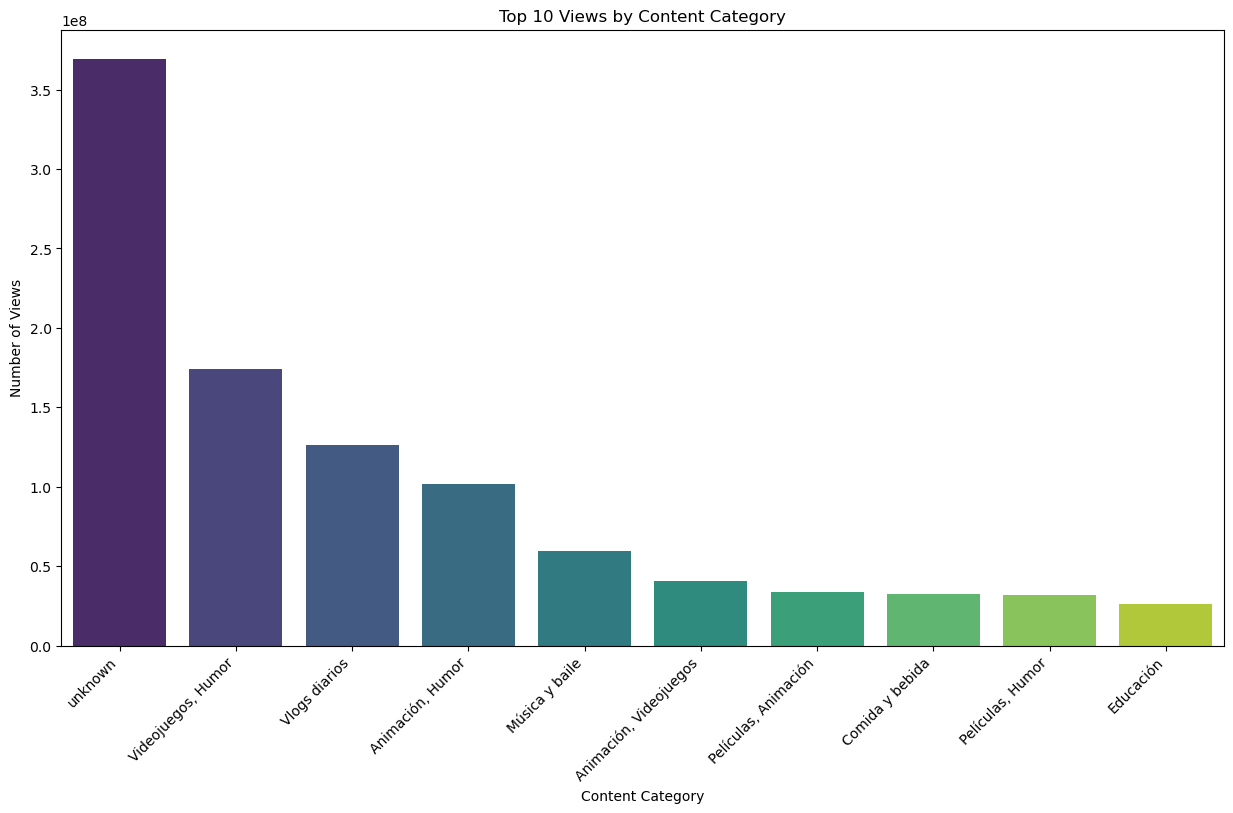

In [27]:
# Assuming 'Categories' is the column representing content categories and 'Views' is the column representing the number of views
# Display the top 10 categories with the highest number of views
top_categories_by_views = df.groupby('Categories')['Views'].sum().nlargest(10)

# Plot a bar chart to visualize the top views by category
plt.figure(figsize=(15, 8))
sns.barplot(x=top_categories_by_views.index, y=top_categories_by_views.values, palette='viridis')
plt.title('Top 10 Views by Content Category')
plt.xlabel('Content Category')
plt.ylabel('Number of Views')
plt.xticks(rotation=45, ha='right')
plt.show()


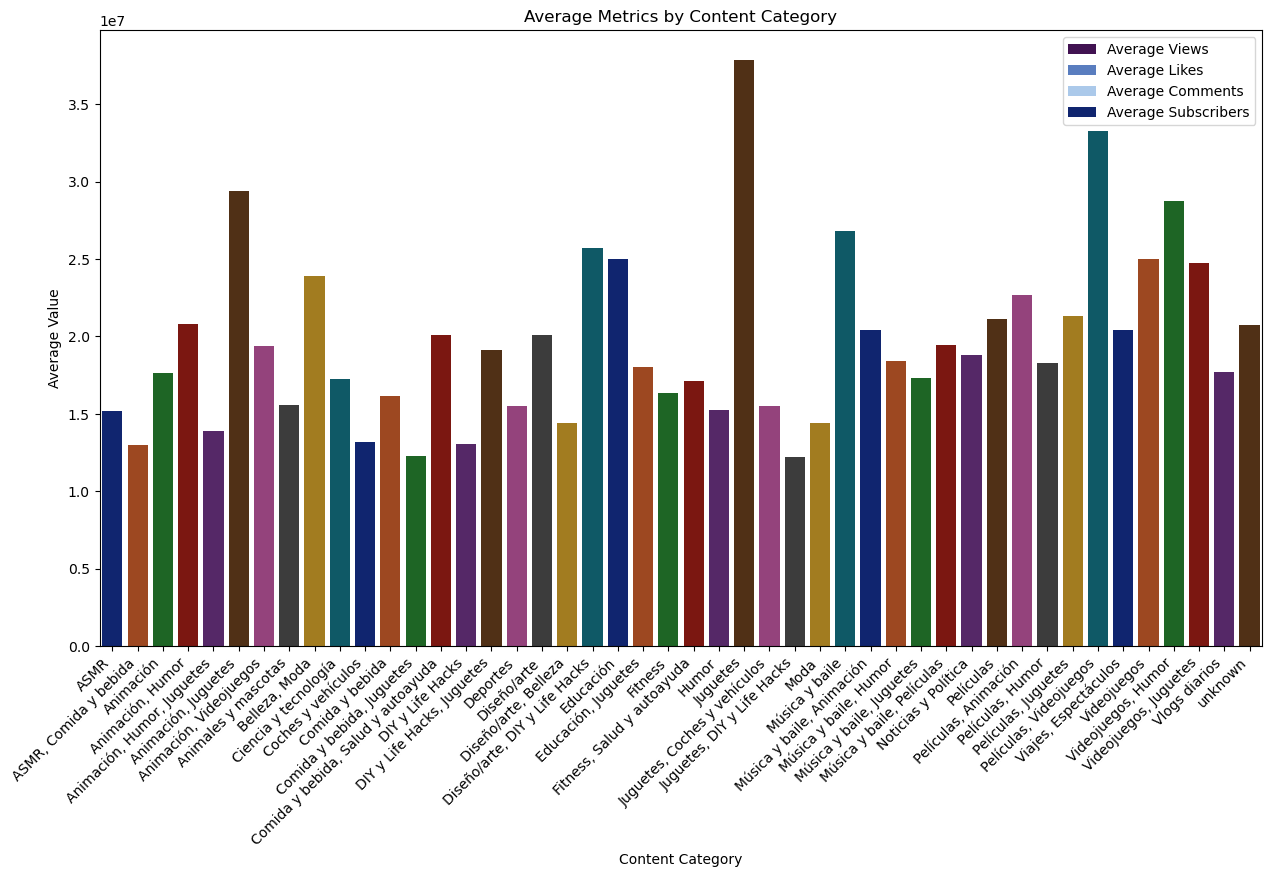

In [28]:
# Assuming 'Categories', 'Views', 'Likes', 'Comments', and 'Subscribers' are the relevant columns in your DataFrame

# Calculate the average metrics for each content category
average_metrics_by_category = df.groupby('Categories').agg({
    'Views': 'mean',
    'Likes': 'mean',
    'Comments': 'mean',
    'Subscribers': 'mean'
}).reset_index()

# Plot bar chart for average metrics
plt.figure(figsize=(15, 8))
sns.barplot(x='Categories', y='Views', data=average_metrics_by_category, palette='viridis', label='Average Views')
sns.barplot(x='Categories', y='Likes', data=average_metrics_by_category, palette='muted', label='Average Likes')
sns.barplot(x='Categories', y='Comments', data=average_metrics_by_category, palette='pastel', label='Average Comments')
sns.barplot(x='Categories', y='Subscribers', data=average_metrics_by_category, palette='dark', label='Average Subscribers')

plt.title('Average Metrics by Content Category')
plt.xlabel('Content Category')
plt.ylabel('Average Value')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()


# Brands and Collaborations:

# Identifying India's Streaming Stars: Top 10 Streamers with the Most Subscribers

Top 50 Indian Streamers by Subscribers:
                Username  Subscribers
0                tseries  249500000.0
3               SETIndia  162600000.0
8        zeemusiccompany   99700000.0
11    GoldminesTelefilms   89700000.0
12               SonySAB   85400000.0
13  5MinuteCraftsYouTube   80300000.0
14                   BTS   76500000.0
16                 zeetv   72500000.0
20              colorstv   66600000.0
21            filmigaane   66400000.0


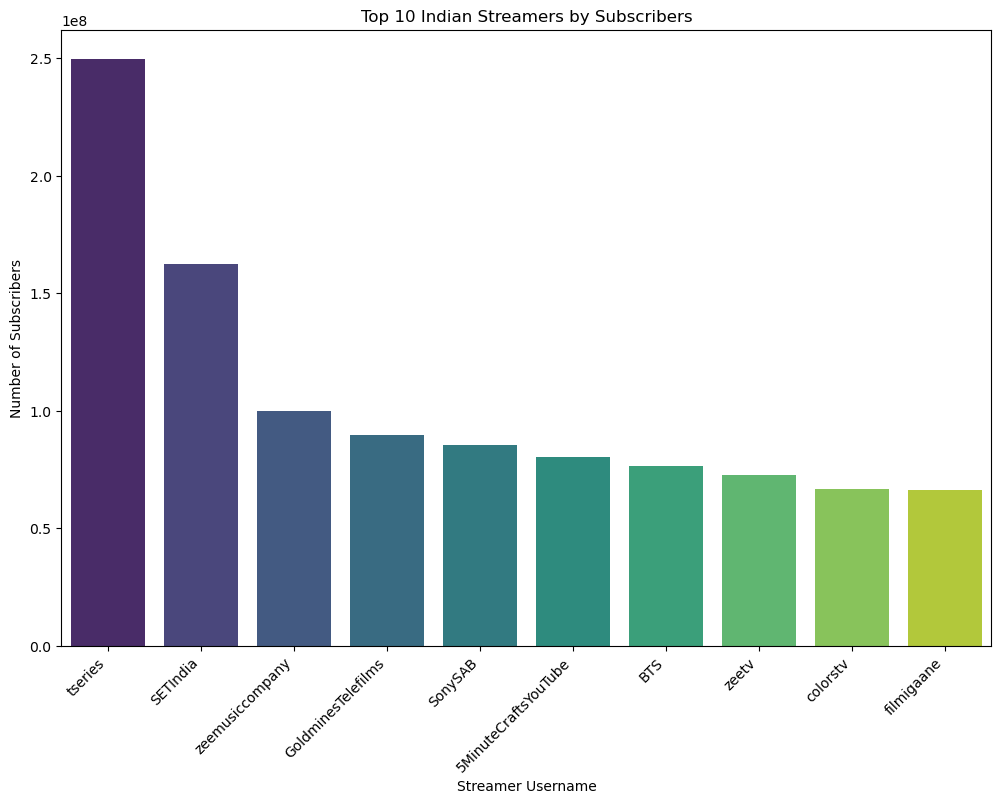

In [29]:
# Assuming 'Country' and 'Subscribers' are relevant columns in your DataFrame
# Assuming 'Username' is the column representing streamer usernames

import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for streamers from India
india_streamers = df[df['Country'] == 'India']

# Find the top 10 streamers with the highest number of subscribers
top_indian_streamers = india_streamers.nlargest(10, 'Subscribers')[['Username', 'Subscribers']]

# Display the top 10 Indian streamers
print("Top 50 Indian Streamers by Subscribers:")
print(top_indian_streamers)

# Visualize the top 10 Indian streamers by subscribers
plt.figure(figsize=(12, 8))
sns.barplot(x='Username', y='Subscribers', data=top_indian_streamers, palette='viridis')
plt.title('Top 10 Indian Streamers by Subscribers')
plt.xlabel('Streamer Username')
plt.ylabel('Number of Subscribers')
plt.xticks(rotation=45, ha='right')
plt.show()


#  Benchmarking:

# Identify streamers with above-average performance in terms of subscribers, Views, likes, and comments.

Streamers with Above-Average Performance:
                  Username  Subscribers        Views      Likes  Comments
1                  MrBeast  183500000.0  117400000.0  5300000.0   18500.0
5                PewDiePie  111500000.0    2400000.0   197300.0    4900.0
26             dudeperfect   59700000.0    5300000.0   156500.0    4200.0
34             TaylorSwift   54100000.0    4300000.0   300400.0   15000.0
39             JuegaGerman   48600000.0    2000000.0   117100.0    3000.0
43                A4a4a4a4   47300000.0    9700000.0   330400.0   22000.0
58               Mikecrack   43400000.0    2200000.0   183400.0    1800.0
62          KimberlyLoaiza   42100000.0    5300000.0   271300.0   16000.0
64         luisitocomunica   41100000.0    2500000.0   128900.0    1800.0
70             JessNoLimit   39600000.0    1300000.0    73500.0    1600.0
96          TotalGaming093   36300000.0    1500000.0   129400.0    4900.0
98    TechnoGamerzOfficial   35600000.0    6200000.0   341800.0   1650

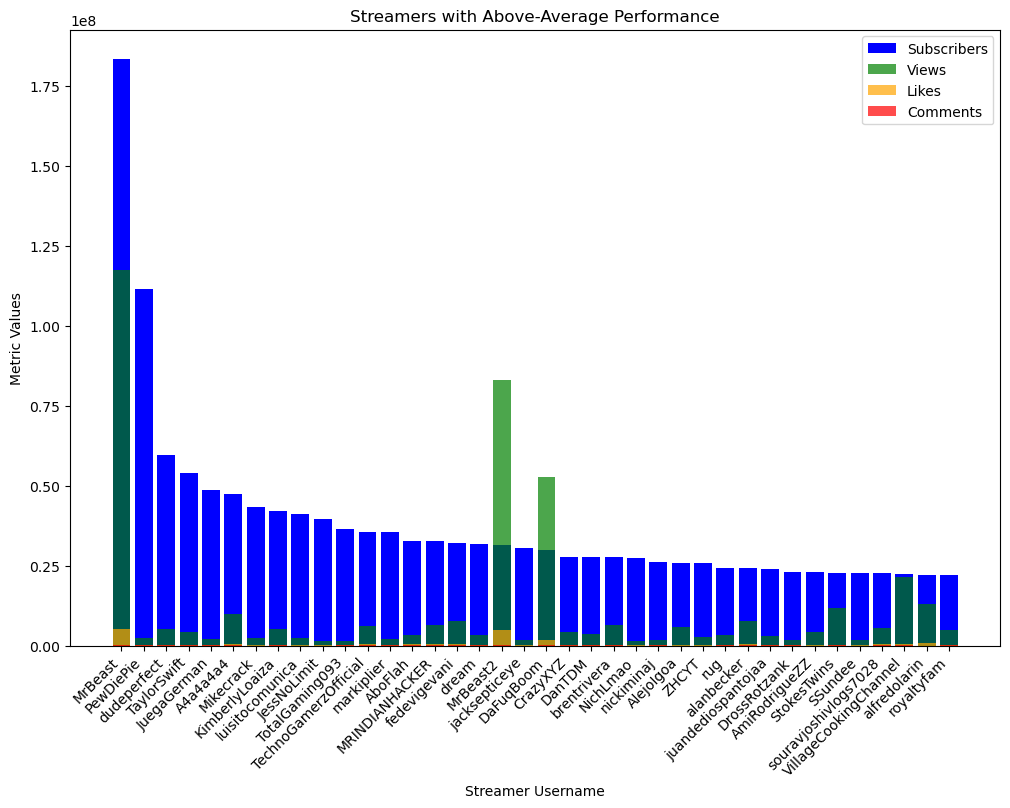

In [30]:
# Assuming 'Subscribers', 'Views', 'Likes', and 'Comments' are relevant columns in your DataFrame
# Assuming 'Username' is the column representing streamer usernames

import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average metrics
average_subscribers = df['Subscribers'].mean()
average_views = df['Views'].mean()
average_likes = df['Likes'].mean()
average_comments = df['Comments'].mean()

# Identify streamers with above-average performance
above_average_streamers = df[
    (df['Subscribers'] > average_subscribers) &
    (df['Views'] > average_views) &
    (df['Likes'] > average_likes) &
    (df['Comments'] > average_comments)
][['Username', 'Subscribers', 'Views', 'Likes', 'Comments']]

# Display the streamers with above-average performance
print("Streamers with Above-Average Performance:")
print(above_average_streamers)

# Visualize streamers with above-average performance using a bar chart
plt.figure(figsize=(12, 8))

# Bar chart for each metric
plt.bar(above_average_streamers['Username'], above_average_streamers['Subscribers'], label='Subscribers', color='blue')
plt.bar(above_average_streamers['Username'], above_average_streamers['Views'], label='Views', color='green', alpha=0.7)
plt.bar(above_average_streamers['Username'], above_average_streamers['Likes'], label='Likes', color='orange', alpha=0.7)
plt.bar(above_average_streamers['Username'], above_average_streamers['Comments'], label='Comments', color='red', alpha=0.7)

plt.title('Streamers with Above-Average Performance')
plt.xlabel('Streamer Username')
plt.ylabel('Metric Values')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.show()


# Who are the top-performing content creators?

Top-Performing Content Creators:
             Username  Subscribers        Views      Likes  Comments  \
1             MrBeast  183500000.0  117400000.0  5300000.0   18500.0   
0             tseries  249500000.0      86200.0     2700.0      78.0   
2           CoComelon  165500000.0    7000000.0    24700.0       0.0   
3            SETIndia  162600000.0      15600.0      166.0       9.0   
4       KidsDianaShow  113500000.0    3900000.0    12400.0       0.0   
5           PewDiePie  111500000.0    2400000.0   197300.0    4900.0   
6  LikeNastyaofficial  107500000.0    2600000.0    28000.0       0.0   
7         VladandNiki  101400000.0    4100000.0    22100.0       0.0   
8     zeemusiccompany   99700000.0      74300.0     2600.0      32.0   
9                 WWE   97200000.0     184500.0     6300.0     214.0   

   CompositeScore  
1     109681850.0  
0      99826407.8  
2      68304940.0  
3      65044714.1  
4      46572480.0  
5      45359950.0  
6      43785600.0  
7      4179442

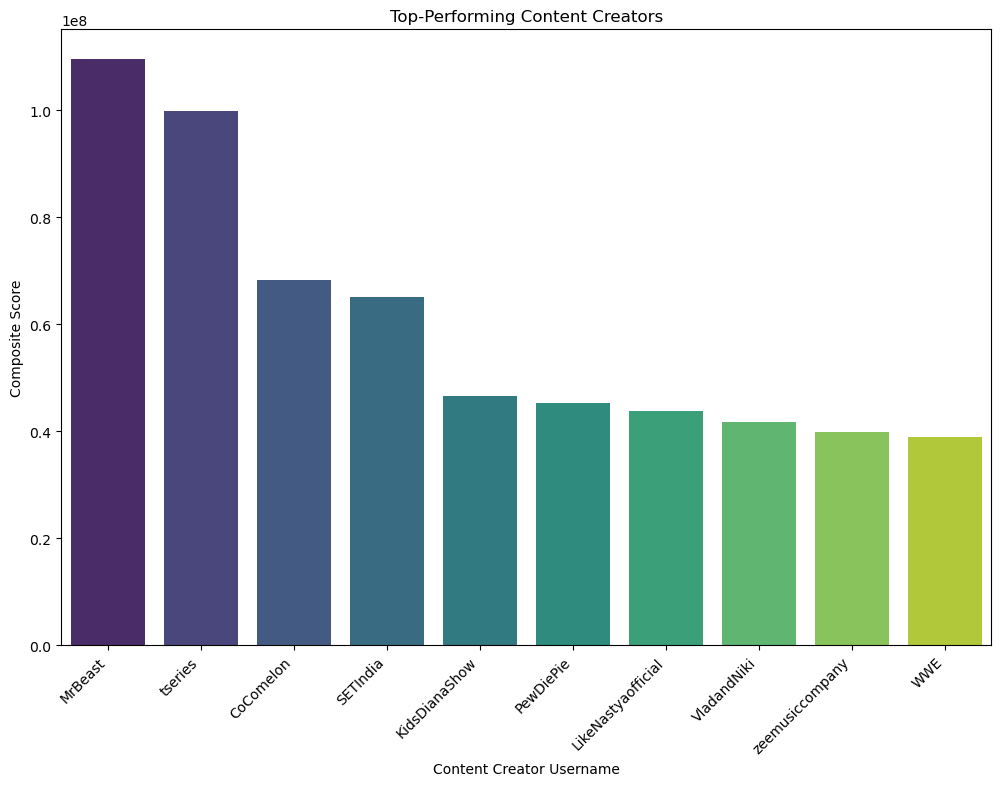

In [31]:
# Assuming 'Subscribers', 'Views', 'Likes', and 'Comments' are relevant columns in your DataFrame
# Assuming 'Username' is the column representing streamer usernames

import matplotlib.pyplot as plt
import seaborn as sns

# Calculate a composite score based on multiple metrics (you can adjust weights based on importance)
df['CompositeScore'] = 0.4 * df['Subscribers'] + 0.3 * df['Views'] + 0.2 * df['Likes'] + 0.1 * df['Comments']

# Find the top-performing content creators
top_performing_creators = df.nlargest(10, 'CompositeScore')[['Username', 'Subscribers', 'Views', 'Likes', 'Comments', 'CompositeScore']]

# Display the top-performing content creators
print("Top-Performing Content Creators:")
print(top_performing_creators)

# Visualize the top-performing content creators using a bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='Username', y='CompositeScore', data=top_performing_creators, palette='viridis')
plt.title('Top-Performing Content Creators')
plt.xlabel('Content Creator Username')
plt.ylabel('Composite Score')
plt.xticks(rotation=45, ha='right')
plt.show()


# Content Recommendations:

# MinMaxScaler

In [32]:
# Normalize performance metrics
scaler = MinMaxScaler()
df[['Subscribers', 'Views', 'Likes', 'Comments']] = scaler.fit_transform(df[['Subscribers', 'Views', 'Likes', 'Comments']])

# Create a user-item matrix
user_item_matrix = df.pivot_table(index='Username', columns='Categories', values='Subscribers', fill_value=0)

# Calculate cosine similarity between users
user_similarity = cosine_similarity(user_item_matrix)

# Create a DataFrame from the similarity matrix
user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)

# Function to get recommendations for a user
def get_recommendations(user, user_similarity_df, user_item_matrix):
    similar_users = user_similarity_df[user].sort_values(ascending=False).index[1:]
    recommendations = []

    for user in similar_users:
        user_preferences = user_item_matrix.loc[user]
        user_recommendations = user_preferences[user_preferences == 0].index
        recommendations.extend(user_recommendations)

    return list(set(recommendations))

# Example: Get recommendations for 'User1'
user1_recommendations = get_recommendations('tseries', user_similarity_df, user_item_matrix)

print(f"Recommendations for tseries: {user1_recommendations}")



Recommendations for tseries: ['Comida y bebida, Salud y autoayuda', 'Juguetes', 'Animación, Juguetes', 'Películas, Humor', 'Videojuegos, Juguetes', 'Música y baile, Humor', 'ASMR, Comida y bebida', 'Vlogs diarios', 'Fitness, Salud y autoayuda', 'Animales y mascotas', 'ASMR', 'Música y baile, Animación', 'Música y baile, Películas', 'Animación, Humor, Juguetes', 'Educación', 'Diseño/arte, DIY y Life Hacks', 'Animación', 'Películas, Juguetes', 'Películas', 'Diseño/arte, Belleza', 'Moda', 'Noticias y Política', 'Comida y bebida', 'Deportes', 'Humor', 'unknown', 'Viajes, Espectáculos', 'Animación, Humor', 'Películas, Videojuegos', 'Animación, Videojuegos', 'Música y baile', 'Belleza, Moda', 'Juguetes, DIY y Life Hacks', 'Videojuegos', 'Fitness', 'Música y baile, Juguetes', 'Videojuegos, Humor', 'DIY y Life Hacks, Juguetes', 'Educación, Juguetes', 'Comida y bebida, Juguetes', 'Diseño/arte', 'Películas, Animación', 'Ciencia y tecnología', 'Juguetes, Coches y vehículos', 'Coches y vehículos',

Top-Performing Content Creators:
               Username  Subscribers     Views     Likes  Comments  \
1               MrBeast     0.722456  1.000000  1.000000  0.120130   
136            MrBeast2     0.082422  0.707836  0.943396  0.075325   
0               tseries     1.000000  0.000734  0.000509  0.000506   
153           DaFuqBoom     0.076114  0.448893  0.320755  0.537662   
2             CoComelon     0.646762  0.059625  0.004660  0.000000   
3              SETIndia     0.634567  0.000133  0.000031  0.000058   
5             PewDiePie     0.419680  0.020443  0.037226  0.031818   
4         KidsDianaShow     0.428091  0.033220  0.002340  0.000000   
6    LikeNastyaofficial     0.402860  0.022147  0.005283  0.000000   
7           VladandNiki     0.377208  0.034923  0.004170  0.000000   

     CompositeScore  
1          0.800995  
136        0.441532  
0          0.400373  
153        0.283031  
2          0.277524  
3          0.253879  
5          0.184632  
4          0.181670 

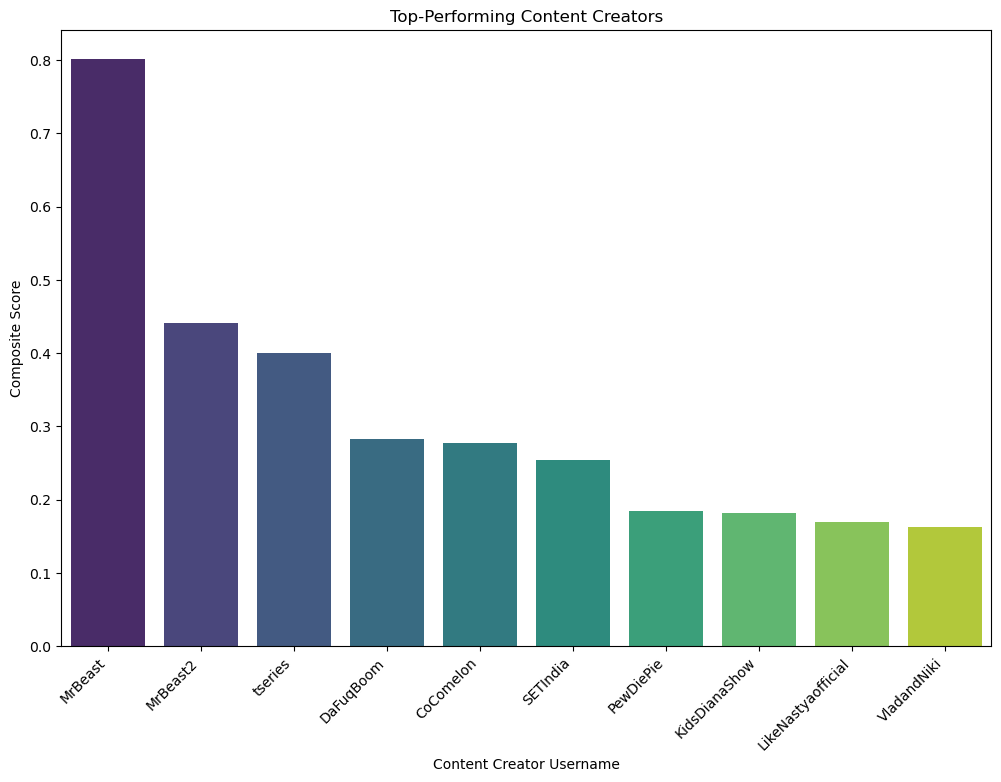

In [33]:
# Assuming 'Subscribers', 'Views', 'Likes', and 'Comments' are relevant columns in your DataFrame
# Assuming 'Username' is the column representing streamer usernames

import matplotlib.pyplot as plt
import seaborn as sns

# Calculate a composite score based on multiple metrics (you can adjust weights based on importance)
df['CompositeScore'] = 0.4 * df['Subscribers'] + 0.3 * df['Views'] + 0.2 * df['Likes'] + 0.1 * df['Comments']

# Find the top-performing content creators
top_performing_creators = df.nlargest(10, 'CompositeScore')[['Username', 'Subscribers', 'Views', 'Likes', 'Comments', 'CompositeScore']]

# Display the top-performing content creators
print("Top-Performing Content Creators:")
print(top_performing_creators)

# Visualize the top-performing content creators using a bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='Username', y='CompositeScore', data=top_performing_creators, palette='viridis')
plt.title('Top-Performing Content Creators')
plt.xlabel('Content Creator Username')
plt.ylabel('Composite Score')
plt.xticks(rotation=45, ha='right')
plt.show()


# Conclusion

* After applying the Min-Max Scaler technique to normalize the dataset metric, identify the top-performing content creators based on the composite score.

* The Estados Unidos has the highest number of users among the countries represented in the dataset.

* The Videojuegos & Humor content are the types of content that people predominantly enjoy.
